In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

from datetime import timedelta
from dateutil.relativedelta import relativedelta
from dateutil.parser import parse

In [3]:
from sqlalchemy.sql import label
from sqlalchemy import *

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect = True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement).order_by(Measurement.date.desc()).first()
print(f"The most recent date in the data set is: {recent_date.date}")

The most recent date in the data set is: 2017-08-23


In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = parse(recent_date.date)
# Calculate the date one year from the last date in data set.
start_date = most_recent_date  + relativedelta(months=-12) - timedelta(days=1)

# Perform a query to retrieve the data and precipitation scores
query_result = session.query(Measurement.date,Measurement.prcp).\
                filter(Measurement.date.between(start_date,most_recent_date)).all()
#print(query_result)

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(query_result, columns=['date', 'prcp'])
df.set_index('date', inplace=True, )
#df.head(10)

# Sort the dataframe by date
df = df.sort_values(["date"])
sorted_df = df.reset_index(drop = False)
sorted_df = sorted_df.dropna(how='any')
sorted_df
# Use Pandas Plotting with Matplotlib to plot the data

,date,prcp
0,2016-08-23,0.00
2,2016-08-23,1.79
3,2016-08-23,0.05
4,2016-08-23,0.15
5,2016-08-23,0.70
...,...,...
2225,2017-08-22,0.00
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


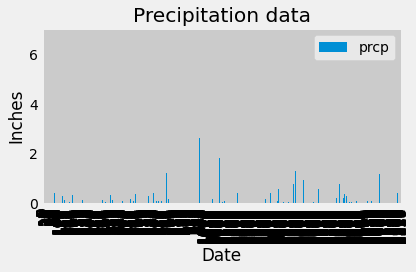

In [12]:
x_axis = sorted_df['date']
sorted_df.plot(kind='bar',title="Precipitation data",label = 'precipitation')

plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(loc="best")

plt.tight_layout()
plt.savefig("Images/Precipitation.png")
plt.show()

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station).count()
print(f"The total number of stations in the dataset is: {station_count}")

The total number of stations in the dataset is: 9


In [15]:

# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_station = session.query(Measurement.station, func.count().label("measurement_count"))\
                                                        .group_by(Measurement.station)\
                                                        .order_by(desc(func.count())).first()

print(f'The most active station is: {active_station.station}')

The most active station is: USC00519281


In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_station.station
print(f'The most active station is: {most_active_station}')
analyse_station = session.query(Measurement, \
                               func.min(Measurement.tobs).label("mini_temp"),\
                                func.max(Measurement.tobs).label("max_temp"),\
                                func.avg(Measurement.tobs).label("average_temp")).filter(Measurement.station == most_active_station).all()
for result in analyse_station:
    print(f"The lowest temperature recorded: {result.mini_temp}")
    print(f"The highest temperature recorded: {result.max_temp}")
    print(f"The average temperature recorded: {result.average_temp}")


The most active station is: USC00519281
The lowest temperature recorded: 54.0
The highest temperature recorded: 85.0
The average temperature recorded: 71.66378066378067


In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station_tob = session.query(Measurement.tobs).\
                filter(Measurement.date.between(start_date,most_recent_date)).\
                filter(Measurement.station == most_active_station).all()

print(active_station_tob)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

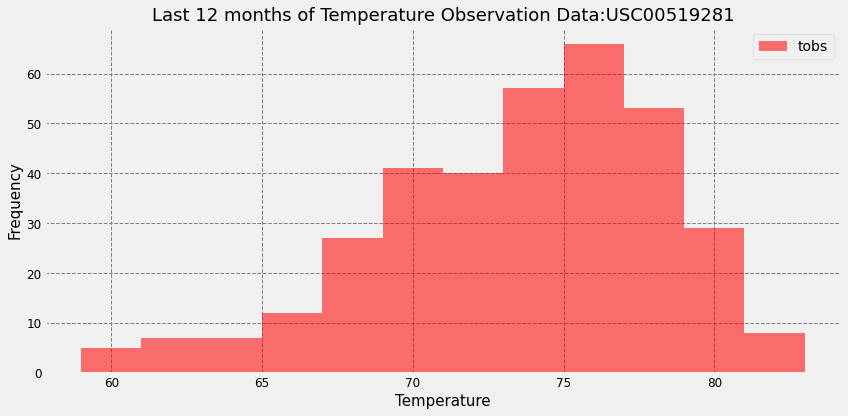

In [18]:
hist_df = pd.DataFrame(active_station_tob, columns=['tobs'])
#hist_df.head(10)

temp_hist_plot = hist_df.hist(column = 'tobs',bins = 12, grid=True, xlabelsize = 12, ylabelsize = 12,\
        figsize=(12, 6),color = 'red',alpha = 0.55,legend = True)

plt.title(f'Last 12 months of Temperature Observation Data:{most_active_station}',fontdict={'fontsize':18})
plt.xlabel('Temperature',fontdict={'fontsize':15})
plt.ylabel('Frequency',fontdict={'fontsize':15})
plt.grid(axis = 'y',color='gray', linestyle='dashed')
plt.grid(axis = 'x',color='gray', linestyle='dashed')

plt.tight_layout()
plt.savefig("Images/station_histogram.png")
plt.show()


# Close session

In [19]:
# Close Session
session.close()